In [1]:
from random import seed
from random import randrange
from csv import reader
from math import sqrt

In [17]:
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        next(csv_reader)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset


In [18]:
def str_column_to_float(dataset, column):
 for row in dataset:
    row[column] = float(row[column].strip())

In [19]:
def train_test_split(dataset, split):
    train = list()
    train_size = split * len(dataset)
    dataset_copy = list(dataset)
    while len(train) < train_size:
        index = randrange(len(dataset_copy))
        train.append(dataset_copy.pop(index))
    return train, dataset_copy

In [20]:
def mean(values):
 return sum(values) / float(len(values))

def variance(values, mean):
 return sum([(x-mean)**2 for x in values])

In [21]:
# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
  covar = 0.0
  for i in range(len(x)):
      covar += (x[i] - mean_x) * (y[i] - mean_y)
  return covar

In [22]:
def coefficients(dataset):
  x = [row[0] for row in dataset]
  y = [row[1] for row in dataset]
  x_mean, y_mean = mean(x), mean(y)
  b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
  b0 = y_mean - b1 * x_mean
  return [b0, b1]

In [23]:
def simple_linear_regression(train, test):
    predictions = list()
    b0, b1 = coefficients(train)
    for row in test:
        yhat = b0 + b1 * row[0]
        predictions.append(yhat)
    return predictions


In [24]:
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += prediction_error**2
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)

In [25]:
# Evaluate the algorithm on the dataset
def evaluate_algorithm(dataset, algorithm, split):
    train, test = train_test_split(dataset, split)
    test_set = [row[:] for row in test]
    actual = [row[1] for row in test]
    predicted = algorithm(train, test_set)
    rmse = rmse_metric(actual, predicted)
    return rmse

In [26]:
filename = 'Boston.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])):
    str_column_to_float(dataset, i)

# Evaluate algorithm
split_ratio = 0.8
rmse = evaluate_algorithm(dataset, simple_linear_regression, split_ratio)
print(f'RMSE: {rmse:.3f}')

RMSE: 8.378


# Linear regression in Statsmodels

In [27]:
import statsmodels.api as sm
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [32]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
raw_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8


In [33]:
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [34]:
X = sm.add_constant(data)

In [35]:
model = sm.OLS(target, X).fit()
predictions = model.predict(X)

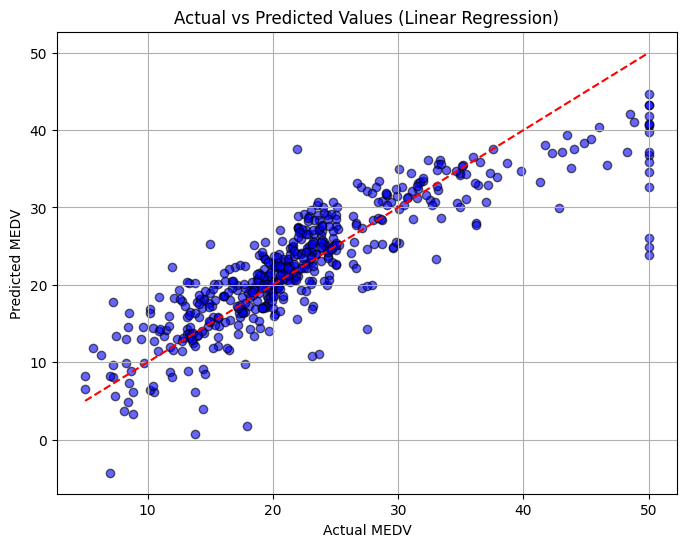

In [40]:
# Scatter plot: actual vs predicted
plt.figure(figsize=(8,6))
plt.scatter(target, predictions, alpha=0.6, color='blue', edgecolors='k')
plt.plot([target.min(), target.max()], [target.min(), target.max()], color='red', linestyle='--')
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.grid(True)
plt.show()

# Linear regression using Scikit-learn

In [42]:
from sklearn import linear_model
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [44]:
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
raw_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8


In [46]:
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [47]:
lm = linear_model.LinearRegression()
model = lm.fit(data,target)

In [48]:
predictions = model.predict(data)

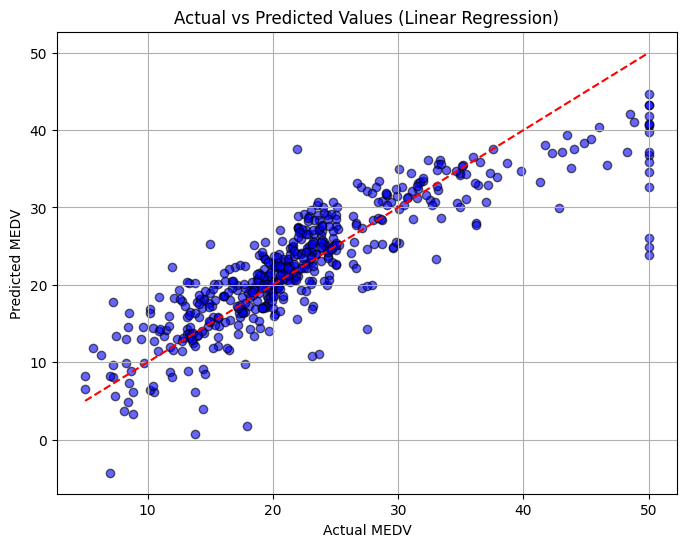

In [49]:
# Scatter plot: actual vs predicted
plt.figure(figsize=(8,6))
plt.scatter(target, predictions, alpha=0.6, color='blue', edgecolors='k')
plt.plot([target.min(), target.max()], [target.min(), target.max()], color='red', linestyle='--')
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.grid(True)
plt.show()

# Linear regression using Scipy

In [50]:
from scipy import stats

In [51]:
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
raw_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8


In [52]:
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

In [57]:
X_one = X[:, 5]  # pick one feature
y = raw_df.values[1::2, 2]

In [58]:
# Perform simple linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(X_one, y)

# Print results
print(f"Slope = {slope:.3f}, Intercept = {intercept:.3f}")
print(f"Equation: y = {slope:.3f}x + {intercept:.3f}")



Slope = 9.102, Intercept = -34.671
Equation: y = 9.102x + -34.671


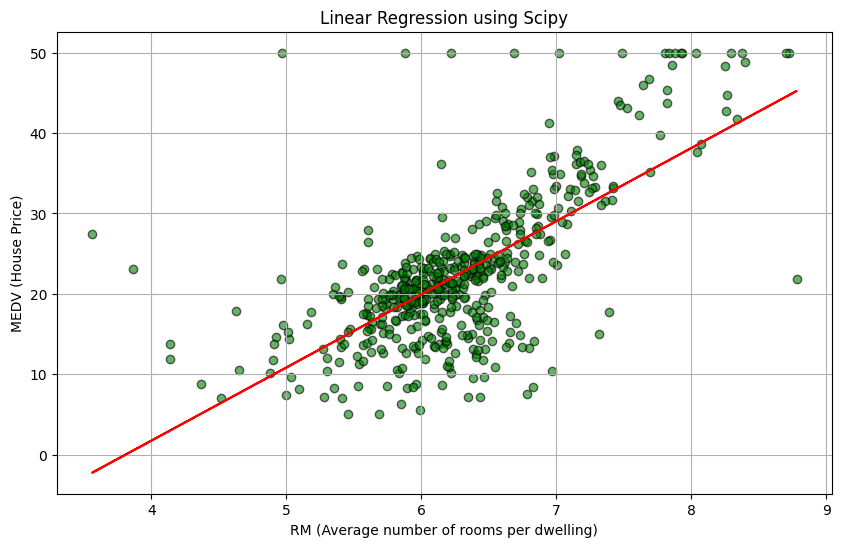

In [59]:
# Plot
plt.figure(figsize=(10,6))
plt.scatter(X_one, y, alpha=0.6, color='green', edgecolors='k')
plt.plot(X_one, slope*X_one + intercept, color='red')
plt.xlabel('RM (Average number of rooms per dwelling)')
plt.ylabel('MEDV (House Price)')
plt.title('Linear Regression using Scipy')
plt.grid(True)
plt.show()